**Chapter 15 - Probability Models**

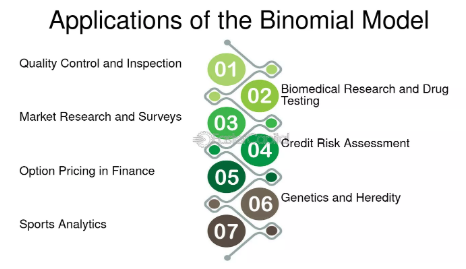

**<u>Random Variables</u>**

A **random variable** assumes a value based on the outcome of a random event.

- We use a capital letter, like *X*, to denote a random variable.

- A particular value of a random variable will be denoted with the corresponding lower case letter, in this case *x*.

- **Discrete random variables** can take one of a countable number of distinct outcomes.

  - *<u>Example</u>*: Number of credit hours

- **Continuous random variables** can take any numeric value within a range of values.

  - *<u>Example</u>*: Cost of books this term

**<u>Probability Models</u>**

A **probability model** for a random variable consists of:

- the collection of all possible values of a random variable, and

- the probabilities that the values occur.

Of particular interest is the value we expect a random variable to take on in the long run, notated *μ* (for population mean) or *E(X)* for **expected value**.

The **expected value** of a (discrete) random variable can be found by summing the products of each possible value by the probability that it occurs:

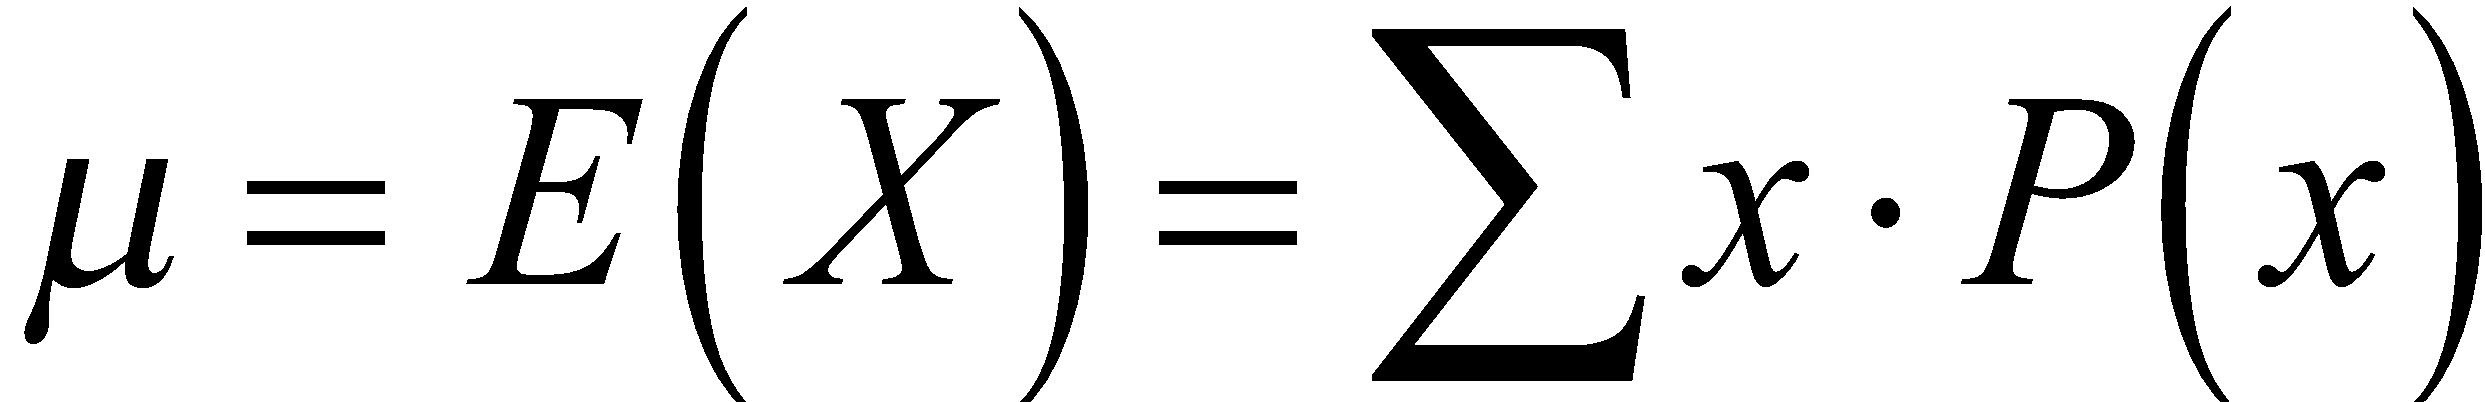

*<u>Note:</u>* Be sure that every possible outcome is included in the sum and verify that you have a valid probability model to start with.

The **variance** for a random variable is:

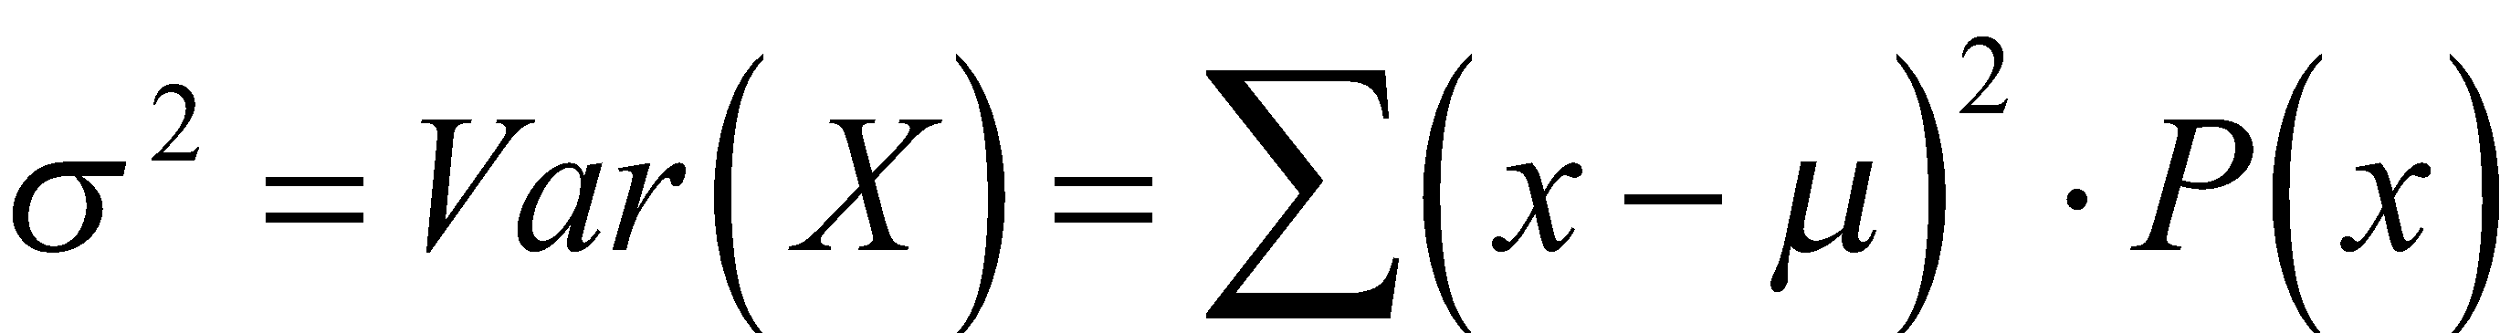

The **standard deviation** for a random variable is:

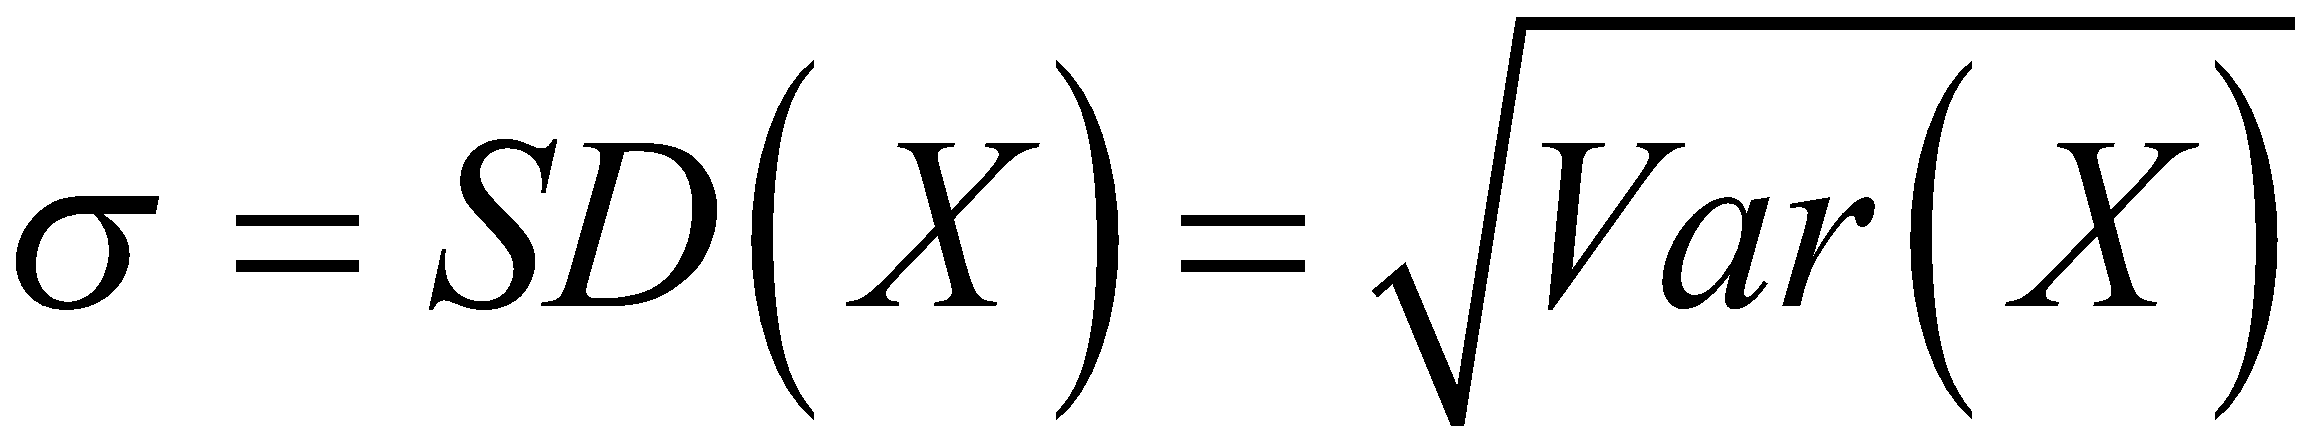

*<u>Example:</u>* An insurance company offers a “death and disability” policy that pays \$10,000 if you die or \$5000 if you are permanently disabled. It charges a premium of only \$50 a year for this benefit.

1.  Create a probability model to analyze the insurance company’s risk.

2.  What is the expected payout per policy?

3.  Interpret what this number means in the context of the problem.

4.  What is the variance of the payout?

5.  What is the standard deviation?

Example: Suppose we select a household at random from the U.S. and let X (a random variable)

be the number of people living in the household. The U.S. Census of 2020 reports the counts for household sizes in the United States.

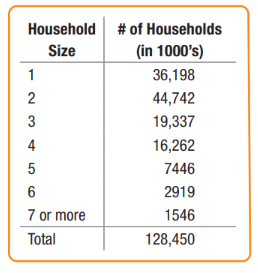

1.  What is the expected household size? What does this mean in context?

2.  What is the variance in household size?

3.  What is the standard deviation of household size?

**<u>Bernoulli Trials:</u>**

The basis for the probability models we will examine in this chapter is the **Bernoulli trial.**

We have Bernoulli trials if:

- there are two possible outcomes (success and failure).

- the probability of success, p, is constant.

- the trials are independent.

**10% Condition:** Bernoulli trials must be independent. If that assumption is violated, it is still okay to proceed as long as the sample is smaller than 10% of the population.

<u>Example:</u> [<u>Bernoulli Trials</u>](https://docs.google.com/document/d/1hPbVZA98N9qndhYgwWTzayW729i7J2IkyqXxWCMan20/edit?usp=sharing) (On paper)


### Interactive Experiment: The Waiting Game (Geometric Model)

While the **Binomial** model counts successes in a fixed number of trials, the **Geometric** model counts how many trials it takes to get **one** success.

*   **Example:** How many times do I have to roll a die until I get a 6? (p = 1/6 $\approx$ 0.17)
*   **Explore:** Change $p$ and see how the "Wait Time" changes. If $p$ is small, you might wait a long time!


In [ ]:

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import display

def plot_geometric(p=0.2):
    # Geometric: P(X=k) = (1-p)^(k-1) * p
    # Waiting until the k-th trial for the first success
    
    k_values = np.arange(1, 21)
    probs = stats.geom.pmf(k_values, p)
    
    mean_wait = 1/p
    
    plt.figure(figsize=(10, 5))
    bars = plt.bar(k_values, probs, color='orange', alpha=0.7)
    
    plt.title(f'Geometric Distribution (p={p})\nExpected Wait Time E(X) = 1/p = {mean_wait:.1f} trials')
    plt.xlabel('Number of Trials to get First Success')
    plt.ylabel('Probability')
    plt.xticks(k_values)
    plt.grid(axis='y', alpha=0.3)
    
    plt.axvline(mean_wait, color='blue', linestyle='--', label=f'Expected Wait ({mean_wait:.1f})')
    plt.legend()
    
    plt.show()

display(widgets.interactive(plot_geometric, 
                            p=widgets.FloatSlider(value=0.2, min=0.05, max=0.9, step=0.05, description='Prob of Success (p):')))


**<u>The Binomial Model:</u>**

- A **Binomial model** tells us the probability for a random variable that counts the number of successes in a fixed number of Bernoulli trials.

- Two parameters define the Binomial model: n, the number of trials; and, p, the probability of success. We denote this Binom(n, p).

**RECALL:** In n trials, there are

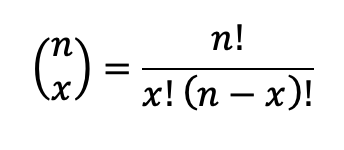

ways to have k successes.

Binomial probability model for Bernoulli trials: Binom(n,p)

n = number of trials

p = probability of success

q = 1 – p = probability of failure

X = \# of successes in n trials

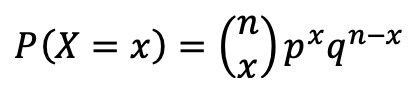$``$

<u>Examples:</u>

A new sales gimmick has 30% of the M&M’s covered with speckles. These “groovy” candies are mixed randomly with the normal candies as they are put into bags for distribution and sale. You buy a bag and remove the candies one at a time looking for speckles.

- Does this example involve Bernoulli trials?

- What’s the probability that the fourth candy we see is speckled?

- What’s the probability the first speckled one is the tenth candy?

- What’s the probability that we will find two speckled ones in a handful of five candies?

- What’s the probability that we will find five speckled ones in a handful of five candies?

- How many candies should we expect to be speckled out of a handful of five candies?

- Can we still use the model if the trials are not independent? Explain.


### Interactive Experiment: Normal Approximation of the Binomial

Binomial calculations can be tedious for large $n$. Fortunately, as the number of trials ($n$) increases, the Binomial distribution often starts to look like a **Normal Distribution**.

**Rule of Thumb:**
The Normal model is a good approximation if we expect at least 10 successes ($np \ge 10$) and at least 10 failures ($nq \ge 10$).

**Explore:**
*   Increase **$n$** and watch the blue bars fit the red curve better.
*   Change **$p$** to extreme values (near 0 or 1) and see how you need a much larger $n$ for the approximation to work.


In [ ]:

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import display, clear_output

def plot_binomial_normal(n, p):
    # Binomial Data
    k = np.arange(0, n + 1)
    binomial_probs = stats.binom.pmf(k, n, p)
    
    # Normal Approximation
    mean = n * p
    std_dev = np.sqrt(n * p * (1 - p))
    x = np.linspace(0, n, 1000)
    normal_curve = stats.norm.pdf(x, mean, std_dev)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(k, binomial_probs, color='skyblue', label=f'Binomial({n}, {p})', alpha=0.7)
    plt.plot(x, normal_curve, color='red', linewidth=2, label=f'Normal Approx ($\mu$={mean:.1f}, $\sigma$={std_dev:.1f})')
    
    plt.title(f'Binomial Model vs. Normal Approximation (n={n}, p={p})')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Rule of Thumb Check
    np_val = n * p
    nq_val = n * (1 - p)
    is_good = np_val >= 10 and nq_val >= 10
    
    status_color = 'green' if is_good else 'orange'
    status_text = f"np = {np_val:.1f}, nq = {nq_val:.1f} -> {'Approximation is Good (>=10)' if is_good else 'Approximation may be Poor (<10)'}"
    
    plt.text(0.5, -0.15, status_text, ha='center', transform=plt.gca().transAxes, fontsize=12, color='black', 
             bbox=dict(facecolor=status_color, alpha=0.2))
    
    plt.show()

# Controls
style = {'description_width': 'initial'}
n_slider = widgets.IntSlider(value=20, min=5, max=500, step=5, description='Trials (n):', style=style)
p_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Probability (p):', style=style)

ui = widgets.VBox([n_slider, p_slider])
out = widgets.interactive_output(plot_binomial_normal, {'n': n_slider, 'p': p_slider})

display(ui, out)


**<u>Normal Approximation for the Binomial Model:</u>**

- Binomial problems sometimes cover too many options.

- When a binomial problem grows to be big and unwieldy, we can use a Normal Model!

- **The Success/Failure Condition** states that a Binomial model is approximately Normal if:

- np ≥ 10 and nq ≥ 10. (We expect at least 10 successes and at least 10 failures.)

<u>Example:</u>

Mortality tables enable actuaries to obtain the probability that a person at any particular age will live a specified number of years. Such probabilities permit the determination of life-insurance premiums, retirement pensions, annuity payments, and related items of importance to insurance companies and others.

According to tables provided by the US National Center for Health Statistics, there is an 80% chance that a person aged 20 will be alive at the age of 65. Suppose three people aged 20 are selected at random.

- How could Bernoulli trials be used in this situation?

- Create a tree diagram of all possible outcomes with the probability of each shown.

- Find the probability that exactly two of the three people will be alive at the age of 65.

- Find the probability that at least one of the three people will be alive at the age of 65.

Instead of a sample size of three, let’s suppose a company of 250 employees invests in a pension for employee retirements. The average age of all employees is 20 but there are concerns that the pension may be underfunded. Determine the mean and standard deviation for the expected number of employees alive at age 65.

- What is the probability that at least 240 employees are still alive at 65?

- What is the probability that at least 215 employees are still alive at 65?

- What is the probability that between 180 and 210 employees are still alive at 65?